# Homework 6
This homework builds on the effective visualization workshop with the Star Trek data. Below is what we completed in class. Output is suppressed for readability, but you can remove the supression on your code if you'd like.

In [17]:
invisible({
suppressPackageStartupMessages(library(tidyverse))

# Get the data.
dialogs <- read_csv(
  "https://raw.githubusercontent.com/Vincent-Toups/bios512/fcbc65a2696c7cff80d0f6ed1dd5c97abf0ef800/effective-visualization/source_data/tng.csv",
  show_col_types = FALSE
)

# print(dialogs)
print(head(dialogs, 10)) # Showing first 10 observations

# Checkout the data.
print(names(dialogs))
dialogs %>% group_by(character) %>% tally() %>% arrange(desc(n))
dialogs %>% mutate(dialog_length=str_length(dialog)) %>% group_by(character) %>% summarize(mean_dialog_length = mean(dialog_length)) %>% arrange(desc(mean_dialog_length))

# Fix weird data.
dialogs %>% filter(character=="BEVERLY'S")

dialogs_fixed <- dialogs %>%
  mutate(
    character = str_replace_all(character, "'S.*$", ""),
    character = str_replace_all(character, " VOICE", ""),
    character = str_replace_all(character, "\\.", ""),
    character = str_replace_all(character, "'", ""),
    character = str_replace_all(character, "S COM", ""),
    character = str_replace_all(character, " COM", ""),
    dialog_length = str_length(dialog)
  ) %>%
  filter(character %in% unlist(str_split("PICARD RIKER DATA TROI BEVERLY WORF WESLEY GEORDI", " ")))

dialogs_fixed %>% group_by(character) %>% summarize(mean_dialog_length = mean(dialog_length), std_dialog_length=sd(dialog_length)) %>% arrange(desc(mean_dialog_length))

dialog_len_per_ep <- dialogs_fixed %>% group_by(character, episode_number) %>% summarize(mean_dialog_length = mean(dialog_length), std_dialog_length=sd(dialog_length), .groups = "drop") %>% arrange(desc(mean_dialog_length))

dialog_len_per_ep

# Plot the data.
ggplot(dialogs_fixed) + geom_density(aes(x=dialog_length))

for_factor <- dialog_len_per_ep %>% group_by(character) %>% summarise(m=mean(mean_dialog_length)) %>% arrange(desc(m))
ggplot(dialog_len_per_ep, aes(factor(character,for_factor$character), mean_dialog_length)) + geom_boxplot()

dialog_len_per_ep <- dialogs_fixed %>% 
    group_by(character, episode_number) %>% 
    summarize(mean_dialog_length = mean(dialog_length), dialog_count=n(), .groups = "drop") %>% 
    arrange(desc(mean_dialog_length))

ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + geom_point(aes(color=character)) + facet_wrap(~character)
})

# A tibble: 10 × 3
   episode_number character dialog                                              
            <dbl> <chr>     <chr>                                               
 1            102 PICARD    Captain's log, stardate 42353.7. Our destination is…
 2            102 PICARD    My orders are to examine Farpoint, a starbase built…
 3            102 PICARD    ... I am becoming better acquainted with my new com…
 4            102 PICARD    I am still somewhat in awe of its size and complexi…
 5            102 PICARD    ... my crew we are short in several key positions, …
 6            102 PICARD    ... a first officer, but I am informed that a highl…
 7            102 PICARD    You will agree, Data, that Starfleet's instructions…
 8            102 DATA      Difficult ... how so? Simply solve the mystery of F…
 9            102 PICARD    As simple as that.                                  
10            102 TROI      Farpoint Station. Even the name sounds mysterious.  
[1] "epis

## Question 1
In class, we left off on the plot below, which shows the distribution of dialog count by mean dialog length, where each point represents an episode. Interpret these results. How can we tell the character's role in the story by their plot?

These plots show that some characters have more consistent ranges of dialog count and length compared to others.  While Picard does have the highest dialog count for an episode, this characters mean dialog length us generally below 100. Wesley has the lowerst by dialog count and also tends to have lower dialog length. A few characters have more variation. For example, Beverly tends to have less dialogs per episode, but has a larger distribution of dialog length, going as high as 150. This is a similar case with Troi, where most of the dialog counts are below 100 per episode, but length varies - going from 0 to almost 200. Characters like Data do not have high variation on either axis. Based on this, we cannot fully infer their role in the plot. It could mean that a character had a lot of minor lines, or a few lines but longer monologues. 

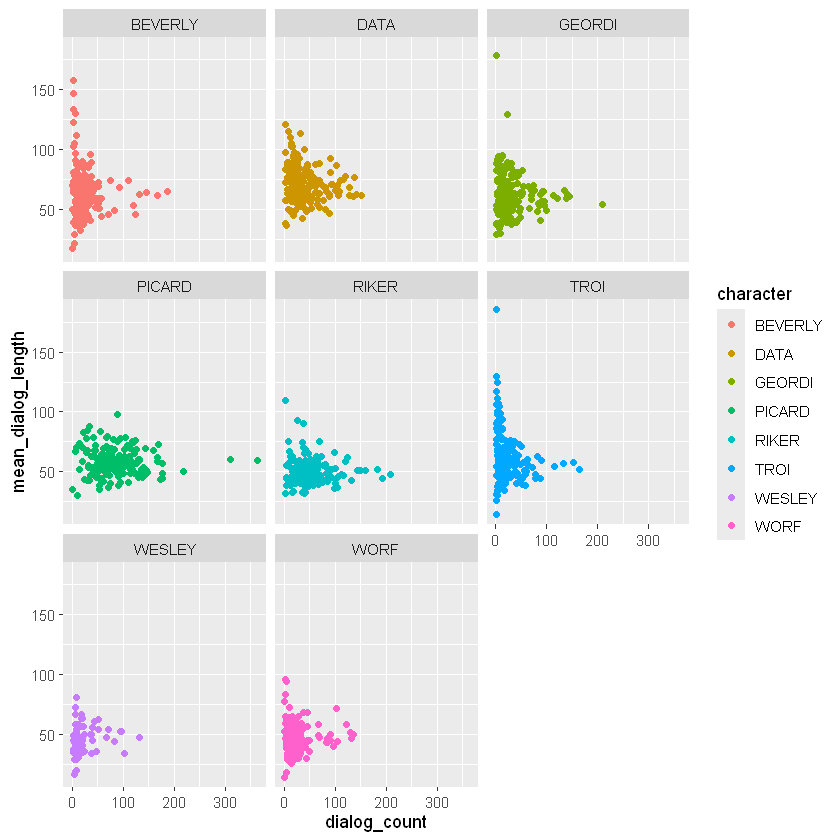

In [18]:
ggplot(dialog_len_per_ep, aes(dialog_count, mean_dialog_length)) + 
    geom_point(aes(color=character)) + 
    facet_wrap(~character)

## Question 2
#### a) Compare Beverly's mean dialog per episode vs. mean dialog count per episode from season 1 (episodes 102-126) to season 3 (episodes 149-174) in a table.  
*Hints*:  
-   First, use `filter()` to get - 1) the dialog from only Beverly's character and 2) the episodes within the ranges given.
-   Then, add a season variable using `mutate()` with `case_when()`.
-   To create the means per episode, after your `mutate()` step, you'll need to `group_by()` season and episode number, then you can do your `summarize()` step to get the means by episode. At the end of the `summary()` statement (inside the parenthesis), add `.groups="drop"`. 
-   Then, to get the mean of means, you'll do the same as above, but only grouping by season. 

In [19]:
# a) 
library(dplyr)
beverly <- dialog_len_per_ep %>% filter(character == "BEVERLY" & episode_number %in% c(102:126, 149:174)) %>% 
 mutate(season = case_when(
    episode_number %in% 102:126 ~ 1,
    episode_number %in% 127:148 ~ 2,  
    episode_number %in% 149:174 ~ 3,
    TRUE ~ NA_real_
  ))

beverly_episode <- beverly %>% group_by(season, episode_number) %>%
 summarise(
    mean_dialog_length = mean(mean_dialog_length, na.rm = TRUE),
    mean_dialog_count = mean(dialog_count, na.rm = TRUE), 
    .groups = "drop"                                 
  )
print(beverly_episode)

beverly_season <- beverly_episode %>%
group_by(season) %>%
 summarise(
    mean_dialog_length = mean(mean_dialog_length, na.rm = TRUE),
    mean_dialog_count = mean(mean_dialog_count, na.rm = TRUE), 
    .groups = "drop"                                 
  )
print(beverly_season)

# A tibble: 50 × 4
   season episode_number mean_dialog_length mean_dialog_count
    <dbl>          <dbl>              <dbl>             <dbl>
 1      1            102               56.7                31
 2      1            103               58.8                45
 3      1            104               55.6                17
 4      1            105               69.2                10
 5      1            106               57.5                11
 6      1            107               36.6                10
 7      1            108               43.6                57
 8      1            109               45.7                30
 9      1            110               50.2                52
10      1            111               48                   9
# ℹ 40 more rows
# A tibble: 2 × 3
  season mean_dialog_length mean_dialog_count
   <dbl>              <dbl>             <dbl>
1      1               56.5              25.4
2      3               67.0              19.6


#### b) In class, we talked about this character saying the actress has stated that after she was fired and rehired, the writers began giving her storylines that made her feel like a male character. How is this reflected in our table?

The tables show that between season 1 and season 3, Beverly's mean dialogue length went up and her mean_dialogue count went down a little. This could be an indication that she was treated more similarly to the male character and being given lines that are longer. We do not know from this what her character is saying but it does follow a closer pattern to the male characters. 

## Question 3
Let's compare the vocabulary richness (unique words / total words) of each character. 
#### a) Tokenize dialog into words, remove punctuation, convert to lowercase. Then filter out the stop words in the list below (from https://gist.github.com/sebleier/554280).
*Hint*: Here's a template for that this step should look like:
```
tokens <- YOUR_DATASET %>%
  # Split each dialog into words
  mutate(word_list = str_split(DIALOG_COLUMN, "\\s+")) %>%
  
  # Unnest the list column so each word is a row
  unnest(word_list) %>%
  
  # Clean words
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),  # Remove punctuation
    word = str_to_lower(word)                         # Convert to lowercase
  ) %>%
  
  # Remove empty strings and stopwords
  filter(word != "", !word %in% STOPWORDS)
```

In [20]:
stop_words <- c(
  "i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself",
  "yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself",
  "they","them","their","theirs","themselves","what","which","who","whom","this","that",
  "these","those","am","is","are","was","were","be","been","being","have","has","had",
  "having","do","does","did","doing","a","an","the","and","but","if","or","because","as",
  "until","while","of","at","by","for","with","about","against","between","into","through",
  "during","before","after","above","below","to","from","up","down","in","out","on","off",
  "over","under","again","further","then","once","here","there","when","where","why","how",
  "all","any","both","each","few","more","most","other","some","such","no","nor","not",
  "only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"
)

In [21]:
tokens <- dialogs_fixed %>%
  # Split each dialog into words
  mutate(word_list = str_split(dialog, "\\s+")) %>%
  
  # Unnest the list column so each word is a row
  unnest(word_list) %>%
  
  # Clean words
  mutate(
    word = str_remove_all(word_list, "[[:punct:]]"),  # Remove punctuation
    word = str_to_lower(word)                         # Convert to lowercase
  ) %>%
  
  # Remove empty strings and stopwords
  filter(word != "", !word %in% stop_words)

print(tokens)

# A tibble: 267,252 × 6
   episode_number character dialog                 dialog_length word_list word 
            <dbl> <chr>     <chr>                          <int> <chr>     <chr>
 1            102 PICARD    Captain's log, starda…           128 Captain's capt…
 2            102 PICARD    Captain's log, starda…           128 log,      log  
 3            102 PICARD    Captain's log, starda…           128 stardate  star…
 4            102 PICARD    Captain's log, starda…           128 42353.7.  4235…
 5            102 PICARD    Captain's log, starda…           128 destinat… dest…
 6            102 PICARD    Captain's log, starda…           128 planet    plan…
 7            102 PICARD    Captain's log, starda…           128 Cygnus    cygn…
 8            102 PICARD    Captain's log, starda…           128 IV,       iv   
 9            102 PICARD    Captain's log, starda…           128 beyond    beyo…
10            102 PICARD    Captain's log, starda…           128 lies      lies 
# ℹ 

#### b) Count unique words per character. Print a summary table with the following columns: character, total words, unique words, and vocabulary richness.  
*Hint*: Group by character, then use `summarize()` to get what you want. You'll use `n_distinct()` to get the unique word counts. Arrange in descending value of vocabulary richness.

In [22]:
token_summary <- tokens %>% group_by(character) %>% summarise(total_words = n(),
                                            unique_words = n_distinct(word),
                                            vocab_richness = unique_words / total_words,
                                            .groups = "drop") 

token_summary %>% arrange(desc(vocab_richness))

character,total_words,unique_words,vocab_richness
<chr>,<int>,<int>,<dbl>
WESLEY,7601,2291,0.3014077
WORF,18820,4318,0.2294368
TROI,19450,4187,0.2152699
BEVERLY,22900,4875,0.2128821
DATA,45462,8593,0.1890150
GEORDI,31978,5465,0.1708987
RIKER,41827,6458,0.1543979
PICARD,79214,9272,0.1170500


#### c) Plot total words versus vocab richness. 
-   Use the character names as the "points".
    -   *Hint*: Use `geom_text()` to add the character names as the points.
-   Do not include a legend.
    -   *Hint*: Use `theme()` to remove the legend.
-   Add a title and axis titles.
    -   *Hint*: Use `labs()` to add titles.

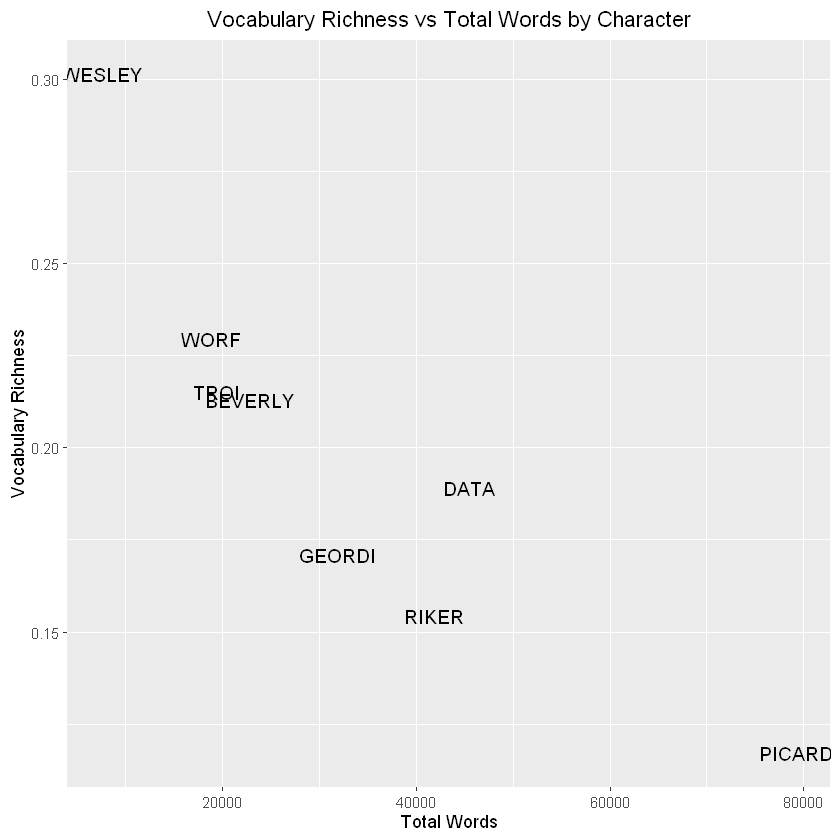

In [23]:
library(ggplot2)

ggplot(token_summary, aes(x = total_words, y = vocab_richness, label = character)) +
  geom_text(size = 4) + 
  labs(
    title = "Vocabulary Richness vs Total Words by Character",
    x = "Total Words",
    y = "Vocabulary Richness"
  ) +
  theme(
    legend.position = "none", 
    plot.title = element_text(hjust = 0.5)  
  )

#### d) Interpret these results. 

Wesley has the most vocabulary richness but a smaller amount of total words. So Wesley has more unique words out of total words spoken. This is the opposite for Picard. He has a lot of total words but seems to repeat some of the same words since he has lower vocabulary richness. Other characters have a more equal ratio of richness to total words such as the character Data

## Question 4
#### a) Find what episode Wesley left the show as a main character and state it explicitly. Meaning, find the first significant gap where he is not found in more than two episodes in a row. 
*Hint*: It's after season 3 (ended at episode 174), so you can filter out seasons 1-3 and print Wesley's dialog count per episode. Then, scan the table for the gap. 

In [27]:
wesley_episodes <- dialog_len_per_ep %>%
  filter(character == "WESLEY", episode_number > 174) %>%
    group_by(episode_number) %>% 
    count(dialog_count)                                  

print(wesley_episodes)
 

# A tibble: 11 × 3
# Groups:   episode_number [11]
   episode_number dialog_count     n
            <dbl>        <int> <int>
 1            175           18     1
 2            176            6     1
 3            177            9     1
 4            178            6     1
 5            179           38     1
 6            181            2     1
 7            183           94     1
 8            206          131     1
 9            219           71     1
10            263           18     1
11            272           97     1


Episode 183 is the first time Wesley is not found in more than 2 episodes in a row. This continues after this episode showing that he left the show as a main character

#### b) After Wesley leaves the main cast, in which episodes does he make cameo appearances?

Cameo appearances in: episodes 219, 263, and 272

#### c) Dig back into the data. Print:
-   Wesley's last piece of dialog before he left the main cast.
-   Wesley's last piece of dialog ever.  
  
*Hint*: To do this, you'll need to filter the `dialogs_fixed` data set to Welsey's lines and the episode number, and use `slice_tail(n = 1)` to get the last observation.

In [30]:
wesley_last_183 <- dialogs_fixed %>%
  filter(character == "WESLEY", episode_number <= 183) %>%
  slice_tail(n = 1) 

print(wesley_last_183)

wesley_last_272 <- dialogs_fixed %>%
  filter(character == "WESLEY") %>%
  slice_tail(n = 1)

print(wesley_last_272) 

# A tibble: 1 × 4
  episode_number character dialog      dialog_length
           <dbl> <chr>     <chr>               <int>
1            183 WESLEY    I can walk.            11
# A tibble: 1 × 4
  episode_number character dialog         dialog_length
           <dbl> <chr>     <chr>                  <int>
1            272 WESLEY    Good-bye, Mom.            14


## Question 5
Create a heatmap with `dialog_len_per_ep` showing mean dialog length per episode for each character. Sort the characters on the y-axis by their overall mean dialog length, with the lowest on top using a factor. Add a title and an axis title. 
*Hints*:
For the factor:
1. Compute overall mean (mean of mean) dialog length per character (`group_by()` then `summarize()`), and arrange the overall mean in ascending order. Add `pull(character)` to the end of this step so that you can use character as a factor in the next step. Store all of this in a new tibble.
2. Convert character to factor with this order. On `dialog_len_per_ep`, you'll use a mutate statement to add the factor `(mutate(character = factor(character, levels = DATAFROMHINT1))`.
3. Create heatmap using `geom_tile()`.
4. If you want nicer colors, you can add `scale_fill_viridis_c()` (or another color scale) to your ggplot statement. **Not required**, but fun to mess around with!

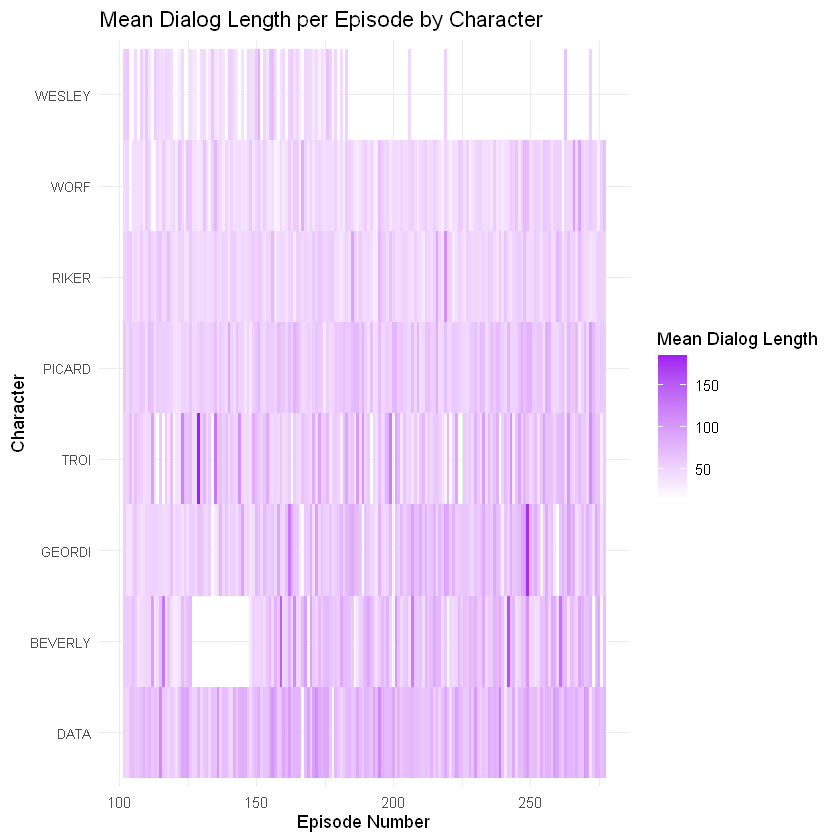

In [35]:
char_order <- dialog_len_per_ep %>%
  group_by(character) %>%
  summarise(overall_mean = mean(mean_dialog_length, na.rm = TRUE)) %>%
  arrange(overall_mean) %>%
  pull(character)

dialog_len_per_ep <- dialog_len_per_ep %>%
  mutate(character = factor(character, levels = rev(char_order)))

ggplot(dialog_len_per_ep, aes(x = episode_number, y = character, fill = mean_dialog_length)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "purple") + 
  labs(
    title = "Mean Dialog Length per Episode by Character",
    x = "Episode Number",
    y = "Character",
    fill = "Mean Dialog Length"
  ) +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8))